# LoRa@FIIT- 18.4.2020


Code Rate: 4/5

Bandwidth: 125 kHz

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Uplink dáta

Načítanie uplink dát

In [2]:
uplink_data = pd.read_csv('uplink_messages.csv', delimiter=',')

In [3]:
uplink_data.head()

,id,app_data,snr,rssi,duty_cycle_remaining,is_primary,receive_time,seq,frequency,spf,power,airtime,coderate,bandwidth,msg_group_number,message_type_id,ap_id,node_id
0,564794,MTQ4LDEwMA==,9.09,-64.7,3554,t,2020-04-17 20:32:35.956,1,866900000,7,14,46,4/5,125000,0,1,111119,xb15
1,564795,NTcsMTAw,9.60,-65.7,2699,t,2020-04-17 20:32:41.466,1,866900000,12,15,901,4/5,125000,0,1,111116,qjvc
2,564796,NTIsMTAw,8.32,-89.3,2699,t,2020-04-17 20:32:42.558,1,866900000,12,15,901,4/5,125000,1,1,111117,qjvc
3,564797,NTUsMTAw,11.12,-96.4,2699,t,2020-04-17 20:32:47.923,1,866900000,12,15,901,4/5,125000,0,1,111111,jrDA
4,564798,MTQ2LDEwMA==,11.32,-44.7,2568,t,2020-04-17 20:32:50.485,1,866900000,12,15,1032,4/5,125000,1,1,111115,jrDA


Odstránime nepotrebné stĺpce

In [4]:
del uplink_data['id']
del uplink_data['msg_group_number']
del uplink_data['is_primary']
del uplink_data['message_type_id']
del uplink_data['coderate']
del uplink_data['bandwidth']
del uplink_data['receive_time']

Pridanie stĺpca pre ruku banditu. Poslúži na neskoršie porovnanie

In [5]:
uplink_data.head()

,app_data,snr,rssi,duty_cycle_remaining,seq,frequency,spf,power,airtime,ap_id,node_id
0,MTQ4LDEwMA==,9.09,-64.7,3554,1,866900000,7,14,46,111119,xb15
1,NTcsMTAw,9.60,-65.7,2699,1,866900000,12,15,901,111116,qjvc
2,NTIsMTAw,8.32,-89.3,2699,1,866900000,12,15,901,111117,qjvc
3,NTUsMTAw,11.12,-96.4,2699,1,866900000,12,15,901,111111,jrDA
4,MTQ2LDEwMA==,11.32,-44.7,2568,1,866900000,12,15,1032,111115,jrDA


In [6]:
uplink_data['arm'] = 'SF' + uplink_data.spf.astype(str) + 'PWR' + uplink_data.power.astype(str)

### Voľba komunikačných parametrov

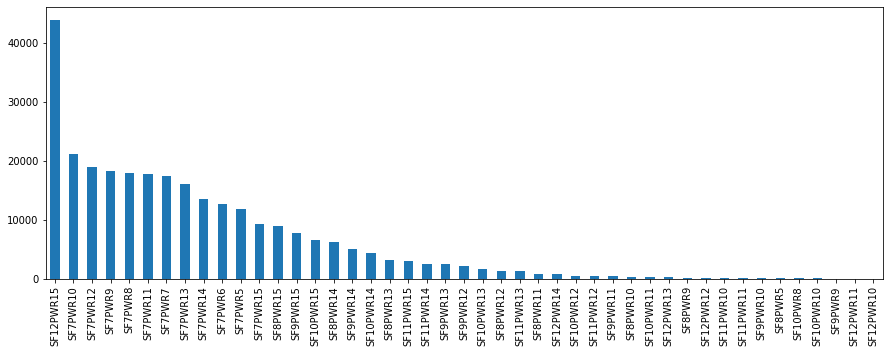

In [7]:
uplink_data.arm.value_counts().plot(kind='bar',figsize=(15,5))

### Voľba komunikačných parametrov a RSSI

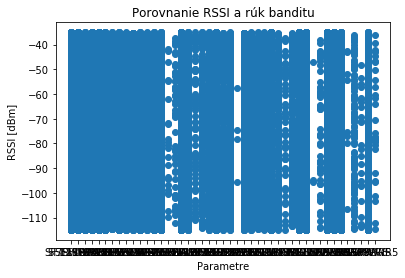

In [8]:
plt.scatter(uplink_data.arm, uplink_data.rssi)
plt.title("Porovnanie RSSI a rúk banditu")
plt.xlabel('Parametre')
plt.ylabel('RSSI [dBm]')
# plt.savefig('bandit_arms_rssi.png')
plt.show()

### Voľba komunikačných parametrov a SNR

Text(0, 0.5, 'SNR [dB]')

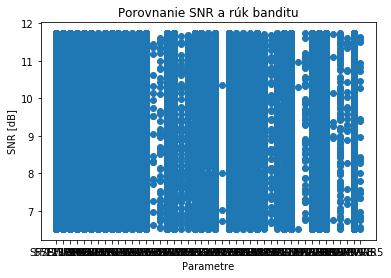

In [12]:
plt.scatter(uplink_data.arm, uplink_data.snr)
plt.title("Porovnanie SNR a rúk banditu")
plt.xlabel('Parametre')
plt.ylabel('SNR [dB]')
# plt.savefig('bandit_arms_snr.png')

### Duty cycle korekcia hodnôt

In [18]:
uplink_data.duty_cycle_remaining.describe()

count    278490.000000
mean       1259.280369
std         779.642671
min           1.000000
25%         566.000000
50%        1238.000000
75%        1960.000000
max        3560.000000
Name: duty_cycle_remaining, dtype: float64

### Faktor šírenia (Spreading Factor)

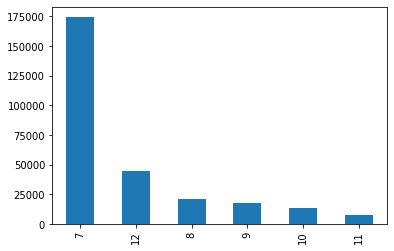

In [19]:
uplink_data.spf.value_counts().plot(kind='bar')

### Využitie frekvenčného pásma

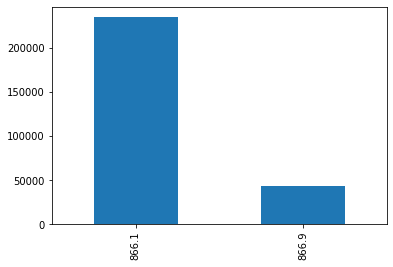

In [20]:
uplink_frequency = uplink_data.frequency / 1000000
uplink_frequency.value_counts().plot(kind='bar')

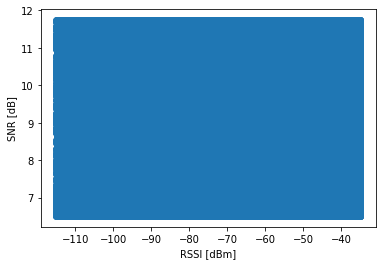

In [22]:
plt.scatter(uplink_data.rssi, uplink_data.snr)
plt.xlabel('RSSI [dBm]')
plt.ylabel('SNR [dB]')
plt.savefig('frequency.png')

### Využitie LoRa prístupových bodov

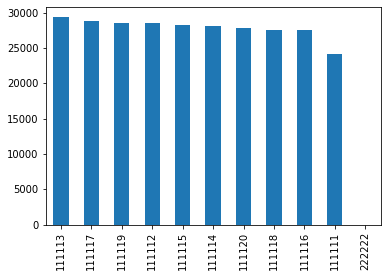

In [23]:
uplink_data.ap_id.value_counts().plot(kind='bar')

### Trvanie prenosu

In [24]:
uplink_data.airtime.value_counts()

46      93146
40      81334
901     29658
1032    15258
82      11193
71       9568
147      9551
128      8309
266      7057
233      6150
568      3899
495      3367
Name: airtime, dtype: int64

### Vysielací výkon (Power)

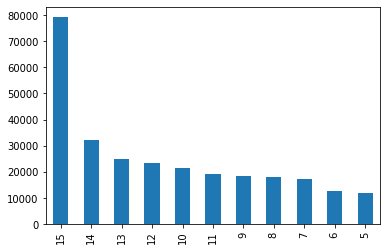

In [25]:
uplink_data.power.value_counts().plot(kind="bar")

### Koncové zariadenia

In [26]:
uplink_data.node_id.describe()

count     278490
unique      2255
top         25Wk
freq         136
Name: node_id, dtype: object

In [27]:
nodes_data = uplink_data.node_id.unique()

In [28]:
uplink_data.node_id

0         xb15
1         qjvc
2         qjvc
3         jrDA
4         jrDA
          ... 
278485    ffbE
278486    WxkG
278487    CMAm
278488    8MmX
278489    aWLW
Name: node_id, Length: 278490, dtype: object

## Downlink Messages

In [29]:
downlink_data = pd.read_csv('downlink_messages.csv', delimiter=',')

In [30]:
downlink_data.head()

,id,app_data,net_data,duty_cycle_remaining,sent,ack_required,delivered,send_time,frequency,spf,power,airtime,coderate,bandwidth,ap_id,node_id
0,90075,NaN,[],1978,t,f,t,2020-04-17 20:51:25.591,866900000,12,15,1032,4/5,125000,111119,0ype
1,88705,NaN,"[{""sf"":7,""power"":7,""type"":""NORMAL""}]",35780,t,f,t,2020-04-17 08:28:58.382,866900000,7,15,40,4/5,125000,111116,CAI4
2,88706,NaN,[],35788,t,f,t,2020-04-17 08:28:59.966,866900000,7,15,46,4/5,125000,111115,UALX
3,88707,NaN,"[{""sf"":7,""power"":6,""type"":""NORMAL""}]",35486,t,f,t,2020-04-17 08:29:00.594,866900000,7,15,40,4/5,125000,111114,JbU4
4,88708,NaN,[],35794,t,f,t,2020-04-17 08:29:02.201,866900000,7,15,40,4/5,125000,111115,E82E


### Využitie LoRa prístupových bodov

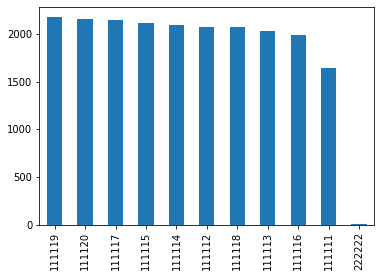

In [31]:
downlink_data.ap_id.value_counts().plot(kind='bar')

### Korekcia duty cycle (Pracovný cyklus)

In [34]:
downlink_data.duty_cycle_remaining.describe()

count    20500.000000
mean      1201.293366
std       4409.449621
min          1.000000
25%        242.000000
50%        516.000000
75%        840.000000
max      35806.000000
Name: duty_cycle_remaining, dtype: float64

### Spreading Factor (Faktor šírenia)

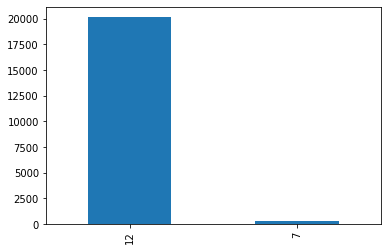

In [35]:
downlink_data.spf.value_counts().plot(kind='bar')

### Využitie frekvenčného pásma

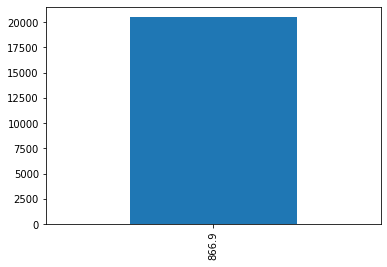

In [36]:
downlink_frequency = downlink_data.frequency / 1000000
downlink_frequency.value_counts().plot(kind='bar')

### Vysielací výkon (Power)

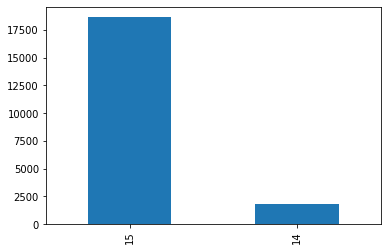

In [37]:
downlink_data.power.value_counts().plot(kind="bar")

### Trvanie prenosu

In [38]:
downlink_data.airtime.value_counts()

901     13465
1032     6698
40        233
46        104
Name: airtime, dtype: int64

### Koncové zariadenia

In [39]:
downlink_data.node_id.describe()

count     20500
unique     2568
top        102Q
freq         20
Name: node_id, dtype: object